# CIFAR10 classification


In [90]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt


from tensorflow.keras import regularizers

from keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical

from keras.layers import Dropout


from keras.datasets import cifar10
import copy 



In [102]:
#import CIFAR10
NUM_CLASSES = 10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(y_train[5][0])

x_test_org=x_test

1


In [103]:

#Change number of classes to 3
#Cat,Dog, others
for i in range (0,len(x_train)):
    if (y_train[i][0]<3 or y_train[i][0]==4 or y_train[i][0]>5):
        y_train[i]=2;
    elif (y_train[i][0]==3):
        y_train[i]=0
    elif (y_train[i][0]==5):
        y_train[i]=2

for i in range (0,len(x_test)):
    if (y_test[i][0]<3 or y_test[i][0]==4 or y_test[i][0]>5):
        y_test[i]=2;
    elif (y_test[i][0]==3):
        y_test[i]=0
    elif (y_test[i][0]==5):
        y_test[i]=2
        
NUM_CLASSES = 3

#change it back to 10 classes
NUM_CLASSES = 10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(y_train[5][0])

actual_single1=y_test;

#=============================
#normalization
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

meanTrainImage=np.zeros(3, dtype=float)
for j in range (0, 3):
    meanTrainImage[j] = np.mean(x_train[:,:,:,j].flatten())


for i in range (0, len(x_train)):
    for j in range (0, 3):
        x_train[i,:,:,j] = copy.copy(x_train[i,:,:,j] - meanTrainImage[j])/255

        
meanTestImage=np.zeros(3, dtype=float)
for j in range (0, 3):
    meanTestImage[j] = np.mean(x_test[:,:,:,j].flatten())


for i in range (0, len(x_test)):
    for j in range (0, 3):
        x_test[i,:,:,j] = copy.copy(x_test[i,:,:,j] - meanTestImage[j])/255
        


print(x_train.shape)    

#categorized the target
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

1
(50000, 32, 32, 3)


In [93]:


#network structure:
input_layer = Input((32,32,3))

x=input_layer

x = Conv2D(32, (3, 3), padding="same", activation="relu") (x)
x = MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding='valid')(x)


x = Conv2D(16, (3, 3), padding="same", activation="relu") (x)
x = MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding='valid')(x)


x = Flatten()(x)

output_layer = Dense(NUM_CLASSES, activation = 'softmax')(x)

model = Model(input_layer, output_layer)




In [94]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 16)        4624      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                10250     
Total para

In [95]:
#Optimization part for the back propagation
opt = Adam(lr=0.0001) #learning rate (lr)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#model.compile(loss=keras.losses.categorical_crossentropy,
              #optimizer=keras.optimizers.Adadelta(),
              #metrics=['accuracy'])


In [96]:
#Training part
model.fit(x_train[1:10000], y_train[1:10000], validation_split=0.33 
          , batch_size=32
          , epochs=50
          , shuffle=True)



Train on 6699 samples, validate on 3300 samples
Epoch 1/50
6699/6699 [==============================] - 3s 454us/step - loss: 2.2433 - acc: 0.1730 - val_loss: 2.1448 - val_acc: 0.2442
Epoch 2/50
6699/6699 [==============================] - 3s 407us/step - loss: 2.0117 - acc: 0.2994 - val_loss: 1.9416 - val_acc: 0.3203
Epoch 3/50
6699/6699 [==============================] - 3s 406us/step - loss: 1.8789 - acc: 0.3451 - val_loss: 1.8727 - val_acc: 0.3424
Epoch 4/50
6699/6699 [==============================] - 3s 405us/step - loss: 1.8098 - acc: 0.3651 - val_loss: 1.8161 - val_acc: 0.3642
Epoch 5/50
6699/6699 [==============================] - 3s 400us/step - loss: 1.7554 - acc: 0.3859 - val_loss: 1.7626 - val_acc: 0.3873
Epoch 6/50
6699/6699 [==============================] - 3s 405us/step - loss: 1.7064 - acc: 0.4035 - val_loss: 1.7257 - val_acc: 0.4024
Epoch 7/50
6699/6699 [==============================] - 3s 401us/step - loss: 1.6636 - acc: 0.4171 - val_loss: 1.6916 - val_acc: 0.4067


In [98]:
#Evaluate the model
model.evaluate(x_test, y_test)


CLASSES = np.array(['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck'])

preds = model.predict(x_test)
preds.shape
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]



10000/10000 [==============================] - 1s 95us/step


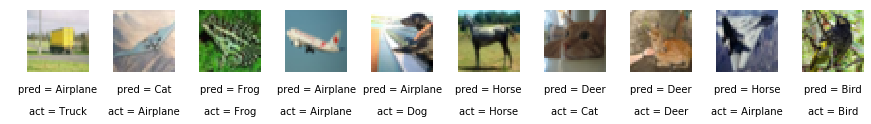

In [104]:
#Visulization for the test part
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 13))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test_org[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)


In [100]:
#Accuracy of each class
class_correct = np.zeros (10)# list(0. for i in range(10))
class_total = np.zeros (10) # list(0. for i in range(10))

for i in range (0,len(x_test)):
    if (actual_single[i]==preds_single[i]):
        class_correct[actual_single1[i]]=class_correct[actual_single1[i]]+1;
    class_total[actual_single1[i]]=class_total[actual_single1[i]]+1;
    
for j in range (0,10):
    print("Accuracy of ",CLASSES[j], ":",class_correct[j]/class_total[j])
    
    

Accuracy of  Airplane : 0.566
Accuracy of  Automobile : 0.672
Accuracy of  Bird : 0.449
Accuracy of  Cat : 0.285
Accuracy of  Deer : 0.416
Accuracy of  Dog : 0.431
Accuracy of  Frog : 0.669
Accuracy of  Horse : 0.611
Accuracy of  Ship : 0.701
Accuracy of  Truck : 0.553
